In [16]:
import pandas as pd

df_income = pd.read_csv('https://github.com/KhalPrawira/Machine-Learning-Course/raw/refs/heads/main/07.%20Week%207/Dataset/income.csv')
df_water = pd.read_csv('https://github.com/KhalPrawira/Machine-Learning-Course/raw/refs/heads/main/07.%20Week%207/Dataset/CitarumWater.csv')
df_heart = pd.read_csv('https://github.com/farrelrassya/teachingMLDL/raw/refs/heads/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/HeartDisease.csv')

print("Dataset Income")
display(df_income.head())
print("Dataset Water")
display(df_water.head())
print("Dataset Heart")
display(df_heart.head())

Dataset Income


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Dataset Water


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


Dataset Heart


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [20]:
print("Inspecting and cleaning datasets:")

print("\n--- df_income Information and Description ---")
income_info = df_income.info()
income_desc = df_income.describe()
display(income_info)
display(income_desc)

for column in ['workclass', 'occupation', 'native-country']:
    if df_income[column].isnull().any():
        df_income[column] = df_income[column].fillna(df_income[column].mode()[0])
print("\nMissing values in df_income after filling:")
display(df_income.isnull().sum())

Q1_age_inc = df_income['age'].quantile(0.25)
Q3_age_inc = df_income['age'].quantile(0.75)
IQR_age_inc = Q3_age_inc - Q1_age_inc
lower_bound_age_inc = Q1_age_inc - 1.5 * IQR_age_inc
upper_bound_age_inc = Q3_age_inc + 1.5 * IQR_age_inc
df_income = df_income[(df_income['age'] >= lower_bound_age_inc) & (df_income['age'] <= upper_bound_age_inc)]
print("\ndf_income head after handling age outliers:")
display(df_income.head())

df_income['capital-gain'] = df_income['capital-gain'].clip(lower=0)
print("\ndf_income head after clipping capital-gain:")
display(df_income.head())

print("\n--- df_water Information and Description ---")
water_info = df_water.info()
water_desc = df_water.describe()
display(water_info)
display(water_desc)

print("\n--- df_heart Information and Description ---")
heart_info = df_heart.info()
heart_desc = df_heart.describe()
display(heart_info)
display(heart_desc)

print("\nDisplaying heads of modified dataframes:")
display(df_income.head())
display(df_water.head())
display(df_heart.head())

Inspecting and cleaning datasets:

--- df_income Information and Description ---
<class 'pandas.core.frame.DataFrame'>
Index: 48469 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48469 non-null  int64 
 1   workclass       48469 non-null  object
 2   fnlwgt          48469 non-null  int64 
 3   education       48469 non-null  object
 4   education-num   48469 non-null  int64 
 5   marital-status  48469 non-null  object
 6   occupation      48469 non-null  object
 7   relationship    48469 non-null  object
 8   race            48469 non-null  object
 9   sex             48469 non-null  object
 10  capital-gain    48469 non-null  int64 
 11  capital-loss    48469 non-null  int64 
 12  hours-per-week  48469 non-null  int64 
 13  native-country  48469 non-null  object
 14  income          48469 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.9+ MB


None

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48469.000000,4.846900e+04,48469.000000,48469.000000,48469.000000,48469.000000
mean,38.319462,1.898884e+05,10.086220,1075.559946,87.406734,40.532567
std,13.247521,1.057115e+05,2.559947,7447.255078,402.241158,12.295059
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.378790e+05,12.000000,0.000000,0.000000,45.000000
max,75.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000



Missing values in df_income after filling:


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0



df_income head after handling age outliers:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



df_income head after clipping capital-gain:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



--- df_water Information and Description ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   object 
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 3

None

,No,pH,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,1250.50000,7.032305,27.856368,3.882005,4.005476,20.511768,1.970393,1.418937e+04,0.074547,1.365796,1.650000
std,721.83216,0.578179,10.551351,2.249329,2.697375,8.969809,1.175104,2.526550e+05,0.320970,1.220703,0.547375
min,1.00000,6.002441,5.000000,0.002140,1.640000,5.440000,0.003784,5.000000e+01,0.004300,0.430000,1.000000
25%,625.75000,6.520722,23.597278,1.925925,2.754331,14.999275,0.955443,2.924867e+02,0.048199,0.840000,1.000000
50%,1250.50000,7.056001,27.671133,3.892147,3.800133,20.044252,1.920408,5.375973e+02,0.065606,1.170000,2.000000
75%,1875.25000,7.531846,31.747063,5.828533,4.947965,25.155492,3.014985,7.829760e+02,0.083315,1.570000,2.000000
max,2500.00000,8.710000,318.000000,7.800000,55.300000,190.000000,5.240000,9.200000e+06,16.000000,14.900000,4.000000



--- df_heart Information and Description ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000



Displaying heads of modified dataframes:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

print("Handling missing values in 'ca' and 'thal' columns of df_heart:")
df_heart['ca'].fillna(df_heart['ca'].median(), inplace=True)
df_heart['thal'].fillna(df_heart['thal'].median(), inplace=True)
print("Missing values after filling:")
display(df_heart.isnull().sum())

print("\nPerforming one-hot encoding:")
categorical_cols_heart = df_heart.select_dtypes(include=['object']).columns
df_heart_processed = pd.get_dummies(df_heart, columns=categorical_cols_heart, drop_first=True)
print("df_heart_processed head after one-hot encoding:")
display(df_heart_processed.head())

X_heart = df_heart_processed.drop('num', axis=1)
y_heart = df_heart_processed['num']

print("\nSplitting df_heart data into training and testing sets:")
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42, stratify=y_heart)

print("X_train_heart shape:", X_train_heart.shape)
print("X_test_heart shape:", X_test_heart.shape)
print("y_train_heart shape:", y_train_heart.shape)
print("y_test_heart shape:", y_test_heart.shape)

print("\nX_train_heart head:")
display(X_train_heart.head())
print("\nX_test_heart head:")
display(X_test_heart.head())
print("\ny_train_heart head:")
display(y_train_heart.head())
print("\ny_test_heart head:")
display(y_test_heart.head())

Handling missing values in 'ca' and 'thal' columns of df_heart:
Missing values after filling:


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0



Performing one-hot encoding:
df_heart_processed head after one-hot encoding:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0



Splitting df_heart data into training and testing sets:
X_train_heart shape: (242, 13)
X_test_heart shape: (61, 13)
y_train_heart shape: (242,)
y_test_heart shape: (61,)

X_train_heart head:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
97,60,0,4,150,258,0,2,157,0,2.6,2,2.0,7.0
82,39,1,3,140,321,0,2,182,0,0.0,1,0.0,3.0
167,54,0,2,132,288,1,2,159,1,0.0,1,1.0,3.0
288,56,1,2,130,221,0,2,163,0,0.0,1,0.0,7.0
71,67,1,4,125,254,1,0,163,0,0.2,2,2.0,7.0



X_test_heart head:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
219,59,1,4,138,271,0,2,182,0,0.0,1,0.0,3.0
271,66,1,4,160,228,0,2,138,0,2.3,1,0.0,6.0
89,51,0,3,130,256,0,2,149,0,0.5,1,0.0,3.0
101,34,1,1,118,182,0,2,174,0,0.0,1,0.0,3.0
67,54,1,3,150,232,0,2,165,0,1.6,1,0.0,7.0



y_train_heart head:


,num
97,3
82,0
167,0
288,0
71,3



y_test_heart head:


,num
219,0
271,0
89,0
101,0
67,0


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

heart_features = df_heart.drop('num', axis=1).reset_index(drop=True)
income_features = df_income[['age', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']].reset_index(drop=True)
water_features = df_water[['pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP', 'Class']].reset_index(drop=True)

min_length_datasets = min(len(heart_features), len(income_features), len(water_features))

heart_features_trimmed = heart_features.iloc[:min_length_datasets]
income_features_trimmed = income_features.iloc[:min_length_datasets]
water_features_trimmed = water_features.iloc[:min_length_datasets]
target_trimmed = df_heart['num'].iloc[:min_length_datasets].reset_index(drop=True)


combined_dataset = pd.concat([heart_features_trimmed, income_features_trimmed, water_features_trimmed, target_trimmed], axis=1)

print("Performing one-hot encoding on combined dataset:")
categorical_columns_combined = combined_dataset.select_dtypes(include=['object']).columns
combined_dataset_encoded = pd.get_dummies(combined_dataset, columns=categorical_columns_combined, drop_first=True)
print("Combined dataset head after one-hot encoding:")
display(combined_dataset_encoded.head())

X_combined = combined_dataset_encoded.drop('num', axis=1)
y_combined = combined_dataset_encoded['num']

print("\nSplitting combined data into training and testing sets:")
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42, stratify=y_combined)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nX_train head:")
display(X_train.head())
print("\nX_test head:")
display(X_test.head())
print("\ny_train head:")
display(y_train.head())
print("\ny_test head:")
display(y_test.head())

Performing one-hot encoding on combined dataset:
Combined dataset head after one-hot encoding:


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,COD,Nitrat,FecalColiform,Fosfat,IP,Class,num,sex_1,sex_Male,income_>50K
0,63,1,145,233,1,2,150,0,2.3,3,...,6.10,1.08,17000.0,0.043,5.12,3,0,True,True,False
1,67,4,160,286,0,2,108,1,1.5,2,...,12.50,1.85,28000.0,0.011,5.91,3,2,True,True,False
2,67,4,120,229,0,2,129,1,2.6,2,...,23.50,1.25,90000.0,0.230,7.76,3,1,True,True,False
3,37,3,130,250,0,0,187,0,3.5,3,...,27.50,1.21,300000.0,0.057,9.61,3,0,True,True,False
4,41,2,130,204,0,2,172,0,1.4,1,...,5.44,1.04,3000.0,0.110,2.44,2,0,False,False,False



Splitting combined data into training and testing sets:
X_train shape: (242, 29)
X_test shape: (61, 29)
y_train shape: (242,)
y_test shape: (61,)

X_train head:


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class,sex_1,sex_Male,income_>50K
97,60,4,150,258,0,2,157,0,2.6,2,...,2.110000,16.100000,1.290000,3500.000000,0.140000,2.69,2,False,False,False
82,39,3,140,321,0,2,182,0,0.0,1,...,3.420000,22.900000,1.240000,11000.000000,0.004300,4.47,2,True,True,False
167,54,2,132,288,1,2,159,1,0.0,1,...,5.181390,16.632282,2.473220,612.195196,0.081824,1.61,2,False,False,False
288,56,2,130,221,0,2,163,0,0.0,1,...,1.793304,17.337260,1.663015,644.376965,0.045247,0.61,1,True,False,False
71,67,4,125,254,1,0,163,0,0.2,2,...,2.980000,24.500000,1.100000,940.000000,0.004300,0.79,1,True,False,False



X_test head:


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class,sex_1,sex_Male,income_>50K
219,59,4,138,271,0,2,182,0,0.0,1,...,2.719129,23.744316,1.546312,393.388165,0.077501,0.78,1,True,True,False
271,66,4,160,228,0,2,138,0,2.3,1,...,5.377447,25.616932,3.132664,348.768578,0.052600,1.67,2,True,False,False
89,51,3,130,256,0,2,149,0,0.5,1,...,1.640000,6.440000,0.920000,790.000000,0.032000,0.59,1,False,True,False
101,34,1,118,182,0,2,174,0,0.0,1,...,2.380000,15.500000,2.620000,3500.000000,0.180000,2.70,2,True,False,False
67,54,3,150,232,0,2,165,0,1.6,1,...,6.350000,50.600000,1.480000,920.000000,0.080000,1.97,2,True,False,True



y_train head:


,num
97,3
82,0
167,0
288,0
71,3



y_test head:


,num
219,0
271,0
89,0
101,0
67,0


In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X_train = X_train.loc[:,~X_train.columns.duplicated()]
X_test = X_test.loc[:,~X_test.columns.duplicated()]

print("X_train columns after removing duplicates:", X_train.columns.tolist())
print("X_test columns after removing duplicates:", X_test.columns.tolist())

print("\nCreating interaction features:")
X_train['age_hours_interaction'] = X_train['age'] * X_train['hours-per-week']
X_test['age_hours_interaction'] = X_test['age'] * X_test['hours-per-week']

X_train['age_capital_interaction'] = X_train['age'] * X_train['capital-gain']
X_test['age_capital_interaction'] = X_test['age'] * X_test['capital-gain']

print("Added interaction features: 'age_hours_interaction', 'age_capital_interaction'")

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'capital-gain', 'capital-loss', 'hours-per-week', 'pH', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP']

print("\nAdding polynomial features (squared terms):")
for feature in numerical_features:
    if feature in X_train.columns: # Check if the feature exists after previous steps
      X_train[feature + '_squared'] = X_train[feature] ** 2
    if feature in X_test.columns: # Check if the feature exists after previous steps
      X_test[feature + '_squared'] = X_test[feature] ** 2

print("Added squared features for numerical columns.")

print("\nScaling numerical features using StandardScaler:")
scaler = StandardScaler()
numerical_cols_to_scale = X_train.select_dtypes(include=np.number).columns # Select all numerical columns after feature engineering
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

print("\nProcessed X_train head:")
display(X_train.head())
print("\nProcessed X_test head:")
display(X_test.head())

X_train columns after removing duplicates: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'capital-gain', 'capital-loss', 'hours-per-week', 'pH', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP', 'Class', 'sex_1', 'sex_Male', 'income_>50K', 'age_hours_interaction', 'age_capital_interaction', 'age_squared', 'trestbps_squared', 'chol_squared', 'thalach_squared', 'oldpeak_squared', 'capital-gain_squared', 'capital-loss_squared', 'hours-per-week_squared', 'pH_squared', 'TSS_squared', 'DO_squared', 'BOD_squared', 'COD_squared', 'Nitrat_squared', 'FecalColiform_squared', 'Fosfat_squared', 'IP_squared']
X_test columns after removing duplicates: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'capital-gain', 'capital-loss', 'hours-per-week', 'pH', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP', 'Class', 'sex_1', 'sex_Male', 'income_>50K'

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,hours-per-week_squared,pH_squared,TSS_squared,DO_squared,BOD_squared,COD_squared,Nitrat_squared,FecalColiform_squared,Fosfat_squared,IP_squared
97,0.594945,0.877858,1.020911,0.169014,-0.418040,1.027269,0.307680,-0.696177,1.320132,0.655669,...,-0.457593,0.397325,-0.101651,-0.478868,-0.149679,-0.220503,-0.734461,-0.098813,-0.065047,-0.443193
82,-1.711319,-0.158443,0.463338,1.327117,-0.418040,1.027269,1.411752,-0.696177,-0.900796,-0.963432,...,-0.271276,-0.672677,-0.124699,-1.006879,-0.180233,-0.269355,-0.694392,-0.099110,-0.063736,-0.294082
167,-0.063987,-1.194743,0.017280,0.720492,2.392117,1.027269,0.396006,1.436416,-0.900796,-0.963432,...,1.115511,-0.283561,-0.120976,-0.343112,-0.193810,-0.227359,-0.767587,-0.098694,-0.064765,-0.391817
288,0.155657,-1.194743,-0.094234,-0.511143,-0.418040,1.027269,0.572657,-0.696177,-0.900796,-0.963432,...,-0.457593,0.559343,-0.121415,1.151950,-0.139674,-0.235647,-0.934434,-0.098696,-0.064372,-0.248725
71,1.363700,0.877858,-0.373021,0.095483,2.392117,-0.985679,0.572657,-0.696177,-0.729955,0.655669,...,-0.457593,-0.021010,-0.101651,-0.957328,-0.171917,-0.268635,-0.565517,-0.098708,-0.063736,-0.281260



Processed X_test head:


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,hours-per-week_squared,pH_squared,TSS_squared,DO_squared,BOD_squared,COD_squared,Nitrat_squared,FecalColiform_squared,Fosfat_squared,IP_squared
219,0.485123,0.877858,0.351824,0.407987,-0.41804,1.027269,1.411752,-0.696177,-0.900796,-0.963432,...,-0.457593,1.074882,-0.120415,-0.235909,-0.166057,-0.269555,-0.890629,-0.098685,-0.064727,-0.279531
271,1.253878,0.877858,1.578483,-0.382464,-0.41804,1.027269,-0.531414,-0.696177,1.063871,-0.963432,...,-0.457593,-0.651570,-0.121238,-0.941650,-0.193370,-0.265374,-0.024005,-0.098683,-0.064464,-0.397481
89,-0.393454,-0.158443,-0.094234,0.132248,-0.41804,1.027269,-0.045623,-0.696177,-0.473694,-0.963432,...,-0.457593,0.031481,-0.064526,0.195159,-0.134464,-0.006594,-0.363697,-0.098702,-0.064189,-0.244927
101,-2.260429,-2.231043,-0.763321,-1.228064,-0.41804,1.027269,1.058449,-0.696177,-0.900796,-0.963432,...,-0.457593,-0.572617,-0.075439,-0.436662,-0.157404,-0.212157,-0.649270,-0.098813,-0.064997,-0.443168
67,-0.063987,-0.158443,1.020911,-0.308934,-0.41804,1.027269,0.660983,-0.696177,0.465929,-0.963432,...,-0.457593,-0.801684,-0.080487,-1.001944,-0.185410,0.400186,-0.858127,-0.098707,-0.064749,-0.420845


In [30]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

boosting_model = xgb.XGBClassifier(random_state=42)
bagging_model = RandomForestClassifier(random_state=42)

boosting_model.fit(X_train, y_train)
bagging_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

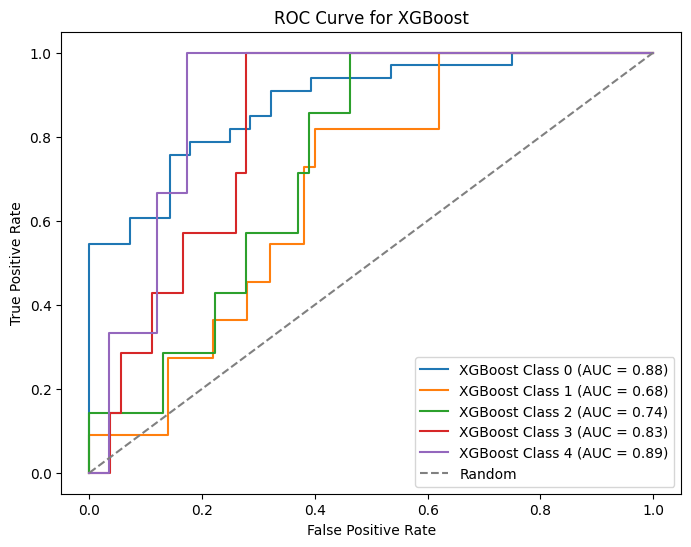

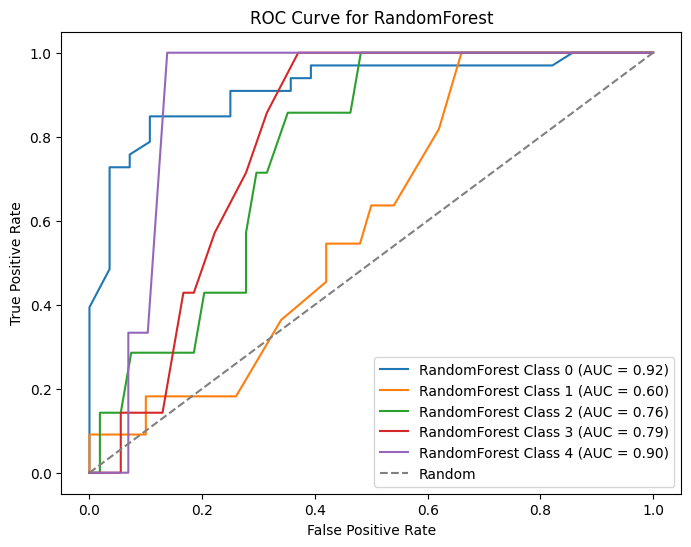

,Model,Accuracy,Precision,Recall,F1-score,AUC
0,XGBoost,0.557377,0.514311,0.557377,0.533880,0.722328
1,RandomForest,0.573770,0.436612,0.573770,0.494325,0.682370


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

y_pred_boosting = boosting_model.predict(X_test)
y_pred_bagging = bagging_model.predict(X_test)

y_prob_boosting = boosting_model.predict_proba(X_test)
y_prob_bagging = bagging_model.predict_proba(X_test)

metrics = {
    'Accuracy': (accuracy_score, {}),
    'Precision': (precision_score, {'average': 'weighted', 'zero_division': 0}),
    'Recall': (recall_score, {'average': 'weighted', 'zero_division': 0}),
    'F1-score': (f1_score, {'average': 'weighted', 'zero_division': 0}),
    'AUC': (roc_auc_score, {'multi_class': 'ovo'})
}
results = []

for model_name, model_predictions, model_probabilities in [('XGBoost', y_pred_boosting, y_prob_boosting), ('RandomForest', y_pred_bagging, y_prob_bagging)]:
    row = {'Model': model_name}
    for metric_name, (metric_func, metric_params) in metrics.items():
        if metric_name == 'AUC':
            row[metric_name] = metric_func(y_test, model_probabilities, **metric_params)
        else:
            row[metric_name] = metric_func(y_test, model_predictions, **metric_params)
    results.append(row)

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_boosting[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob_boosting[:, i])


plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'XGBoost Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_bagging[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob_bagging[:, i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'RandomForest Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForest')
plt.legend()
plt.show()


import pandas as pd
results_df = pd.DataFrame(results)
display(results_df)

In [38]:
import pandas as pd

print("Model Evaluation Results:")
display(results_df)

print("\nAnalysis: Model Comparison")

# Create a list of dictionaries for the analysis table
analysis_data = []

for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']:
    xgb_score = results_df[results_df['Model'] == 'XGBoost'][metric].values[0]
    rf_score = results_df[results_df['Model'] == 'RandomForest'][metric].values[0]

    analysis_entry = {
        'Metric': metric,
        'XGBoost': f"{xgb_score:.4f}",
        'RandomForest': f"{rf_score:.4f}",
        'Better Model': 'XGBoost' if xgb_score > rf_score else ('RandomForest' if rf_score > xgb_score else 'Equal')
    }
    analysis_data.append(analysis_entry)

# Create a DataFrame from the analysis data
analysis_df = pd.DataFrame(analysis_data)

# Display the analysis table
display(analysis_df)

Model Evaluation Results:


,Model,Accuracy,Precision,Recall,F1-score,AUC
0,XGBoost,0.557377,0.514311,0.557377,0.533880,0.722328
1,RandomForest,0.573770,0.436612,0.573770,0.494325,0.682370



Analysis: Model Comparison


,Metric,XGBoost,RandomForest,Better Model
0,Accuracy,0.5574,0.5738,RandomForest
1,Precision,0.5143,0.4366,XGBoost
2,Recall,0.5574,0.5738,RandomForest
3,F1-score,0.5339,0.4943,XGBoost
4,AUC,0.7223,0.6824,XGBoost


## Matriks Evaluasi Terbaik:

**F1 Score** adalah rata-rata harmonis dari **Precision** dan **Recall**. Metrik ini digunakan untuk mengukur akurasi model pada dataset dengan distribusi kelas yang tidak seimbang (imbalanced classes), memberikan keseimbangan antara kemampuan model untuk membuat prediksi positif yang benar (Precision) dan kemampuan untuk menemukan semua instance positif (Recall).

*   **Precision:** $\frac{True \, Positives}{True \, Positives + False \, Positives}$
*   **Recall:** $\frac{True \, Positives}{True \, Positives + False \, Negatives}$


## Persamaan Matematika

Berikut adalah persamaan matematika untuk metrik evaluasi yang kita gunakan dalam analisis:

*   **Accuracy (Akurasi):** Proporsi total prediksi yang benar.
$Accuracy = \frac{True \, Positives + True \, Negatives}{True \, Positives + True \, Negatives + False \, Positives + False \, Negatives}$
*   **Precision (Presisi):** Proporsi instance positif yang diprediksi dengan benar dari semua prediksi positif.
$Precision = \frac{True \, Positives}{True \, Positives + False \, Positives}$
*   **Recall (Recall):** Proporsi instance positif yang diprediksi dengan benar dari semua instance yang sebenarnya positif.
$Recall = \frac{True \, Positives}{True \, Positives + False \, Negatives}$
*   **F1-score:** Rata-rata harmonis dari Precision dan Recall.
$F1 \, Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}$
*   **Area Under the ROC Curve (AUC):** Mengukur kemampuan model membedakan antara kelas positif dan negatif. Secara umum, AUC dihitung dari area di bawah kurva ROC (plot True Positive Rate vs False Positive Rate). Untuk multi-kelas, ini biasanya dirata-ratakan di seluruh kelas.